<a href="https://colab.research.google.com/github/iam-pattan/Exploring-DL/blob/master/Img_clf_without_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

In [2]:
import numpy as np
from scipy.ndimage import convolve
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [3]:
X, y = load_digits(return_X_y=True)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [6]:
def show(img):
  return plt.imshow(img.reshape(8,8), interpolation='lanczos', cmap='gray')

(<matplotlib.image.AxesImage at 0x7f28959b0ad0>, 0)

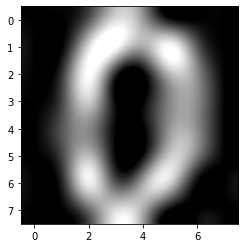

In [41]:
show(X[0]), y[0]

In [29]:
model = Sequential([
                    Dense(256, activation='relu'),
                    Dense(128, activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(10, activation='softmax')
])
model.layers

In [30]:
model.compile(optimizer='sgd', loss='mse', metrics='accuracy')

In [31]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=3)

Epoch 1/3
45/45 [==============================] - 1s 9ms/step - loss: 27.5106 - accuracy: 0.0937 - val_loss: 30.2631 - val_accuracy: 0.0861
Epoch 2/3
45/45 [==============================] - 0s 3ms/step - loss: 26.7913 - accuracy: 0.1012 - val_loss: 30.2590 - val_accuracy: 0.0861
Epoch 3/3
45/45 [==============================] - 0s 2ms/step - loss: 27.6794 - accuracy: 0.1106 - val_loss: 30.2573 - val_accuracy: 0.1083


In [32]:
model.predict_classes(X_test)[12]

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


6

In [33]:
np.argmax(model.predict(X_test)[12])

6

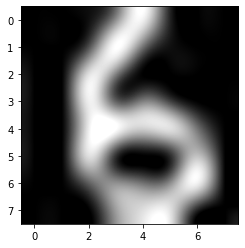

In [34]:
show(X_test[12])

Text(0.5, 0, 'Epoch')

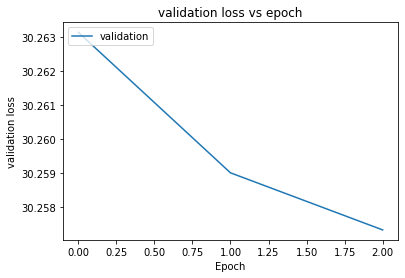

In [35]:
# Val loss
fig = plt.figure()
plt.plot(history.history['val_loss'])
plt.legend(['validation'], loc='upper left')
plt.title('validation loss vs epoch')
plt.ylabel('validation loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

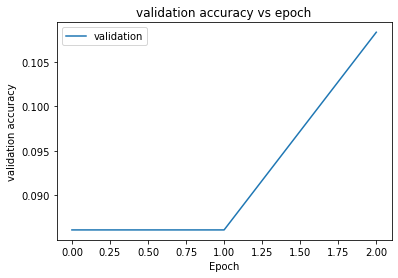

In [36]:
# Val accuracy 
fig = plt.figure()
plt.plot(history.history['val_accuracy'])
plt.legend(['validation'], loc='upper left')
plt.title('validation accuracy vs epoch')
plt.ylabel('validation accuracy')
plt.xlabel('Epoch')